Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import numpy as np

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

data.shape, test.shape

((59400, 41), (14358, 40))

In [144]:
#train/validate split
train, val = train_test_split(data, random_state=42)

train.shape, val.shape, test.shape

((44550, 41), (14850, 41), (14358, 40))

In [145]:
#Define a function to wrangle train, validate, and test sets in the same way. 
#Clean outliers and engineer features.

def wrangle(X):
  """Wrangle train, validate, and test sets in the same way"""
    
  # Prevent SettingWithCopyWarning
  X = X.copy()
    
  # About 3% of the time, latitude has small values near zero,
  # outside Tanzania, so we'll treat these values like zero.
  X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
  # When columns have zeros and shouldn't, they are like null values.
  # So we will replace the zeros with nulls, and impute missing values later.
  #confirmed model is .2% worse when excluding population here
  cols_with_zeros = ['longitude', 'latitude','construction_year','population']
  for col in cols_with_zeros:
      X[col] = X[col].replace(0, np.nan)
  
  #drop duplicate columns
  # quantity & quantity_group are duplicates, so drop one
  # payment == payment_type
  X = X.drop(columns=['quantity_group','payment_type'])
  
  #recode permit to 1/0
  #this doesn't turn out make a meaningful difference
  #X['permit'] = X['permit'].replace({True: 1, False: 0})
  
  #new feature: whether amount_tsh is 0 or not
  #it turns out to be wildly unimportant!
  #(might be helpful on a regression; trees don't need it)
  #X['0_tsh'] = X['amount_tsh'] == 0
  
  #convert date_recorded to datetime
  X['date_recorded'] = X['date_recorded'].apply(pd.to_datetime)
  
  #create 'age' column, the number of years between construction and evaluation
  X['age'] = X['date_recorded'].apply(lambda d: d.year) - X['construction_year']
  
  #pare down high-cardinality variables prior to encoding
  #if a category has fewer than threshold observations, nan it
  #since we're ordinal encoding now, let's try removing this
  #removing it = modest validation accuracy increase
  
  #threshold = 600 #tweaking threshold value for best results
  #value_counts = X['funder'].value_counts()
  #to_remove = value_counts[value_counts < threshold].index
  #X['funder'] = X['funder'].replace(to_remove, np.nan)
  
  #value_counts = X['installer'].value_counts()
  #to_remove = value_counts[value_counts < threshold].index
  #X['installer'] = X['installer'].replace(to_remove, np.nan)
  
  #value_counts = X['lga'].value_counts()
  #to_remove = value_counts[value_counts < threshold].index
  #X['lga'] = X['lga'].replace(to_remove, np.nan)
  
  #scheme_management has fine cardinality but a pesky "None" observed once
  X['scheme_management'] = X['scheme_management'].replace('None', np.nan)
  
  #bools for whether the waterpoint is marked as rural or urban
  #...make it a tiny bit worse
  #X['rural'] = X['lga'].apply(lambda s: "Rural" in s)
  #X['urban'] = X['lga'].apply(lambda s: "Urban" in s)
  
  #fill nans in latitude and longitude with averages for the region/basin
  #instead of relying on the simple imputer
  #using region makes the model worse by .3%
  #using basin makes it better by about the same amount!
  X2 = pd.DataFrame(columns=X.columns)

  for basin in X['basin'].value_counts().index:
    df = X[X['basin'] == basin]
    lat_mean = df['latitude'].mean()
    long_mean = df['longitude'].mean()
    df['latitude'] = df['latitude'].replace(np.nan,lat_mean)
    df['longitude'] = df['longitude'].replace(np.nan,long_mean)
    X2 = X2.append(df)
    
  # return the wrangled dataframe
  #return X
  return X2

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age
22630,49654,0.0,2013-02-16,Dwsp,0,DWE,32.760158,-2.241896,Mwamahonza,0,Lake Victoria,Mwamahala,Mwanza,17,1,Magu,Nkungulu,NaN,NaN,GeoData Consultants Ltd,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,NaN
13789,39287,0.0,2011-08-13,Dasip,0,DASIP,33.312321,-2.814100,Chanongu,0,Lake Victoria,Chanongu,Mwanza,19,4,Kwimba,Wala,NaN,True,GeoData Consultants Ltd,VWC,NaN,True,NaN,india mark ii,india mark ii,handpump,vwc,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,NaN
37445,10402,0.0,2012-12-13,Hsw,1145,HSW,33.684943,-1.682633,Kwa Mama Wille,0,Lake Victoria,Central,Mara,20,3,Musoma Rural,Mugango,250.0,False,GeoData Consultants Ltd,VWC,HSW,True,1999.0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,13.0
22545,62130,0.0,2013-01-18,Anglican Church,1336,Anglican Uganda,34.310171,-1.884334,John Matara,0,Lake Victoria,Bunguma,Mara,20,2,Serengeti,Rigicha,420.0,True,GeoData Consultants Ltd,VWC,NaN,NaN,1999.0,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14.0
46079,59561,100.0,2012-10-21,Hsw,1341,HSW,34.112079,-1.714853,Kukyonyo,0,Lake Victoria,Nyawikomba,Mara,20,3,Musoma Rural,Buhemba,350.0,True,GeoData Consultants Ltd,VWC,NaN,True,1993.0,afridev,afridev,handpump,vwc,user-group,pay monthly,salty,salty,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional,19.0


In [0]:
#feature selection!
#just dumping in all the features (aside from date_recorded, which causes an error)
#isn't actually all that much better than this list I used yesterday

target = 'status_group'
features = ['amount_tsh','funder','gps_height','installer','longitude','latitude',
            'basin','region','lga','population','permit','construction_year',
           'extraction_type_group','management','payment','water_quality',
           'quantity','source','waterpoint_type','age']

#X_train = train[features]
X_train = train.drop(columns=[target,'date_recorded'])
y_train = train[target]

#X_val = val[features]
X_val = val.drop(columns=[target,'date_recorded'])
y_val = val[target]

#X_test = test[features]
X_test = test.drop(columns=['date_recorded'])

In [147]:
#pipeline includes:
#encoding of categorical variables as ordinal/numeric
#imputer for nans (median and mean are within .1% of each other in performance)
#random forest (many trees)
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8053872053872054


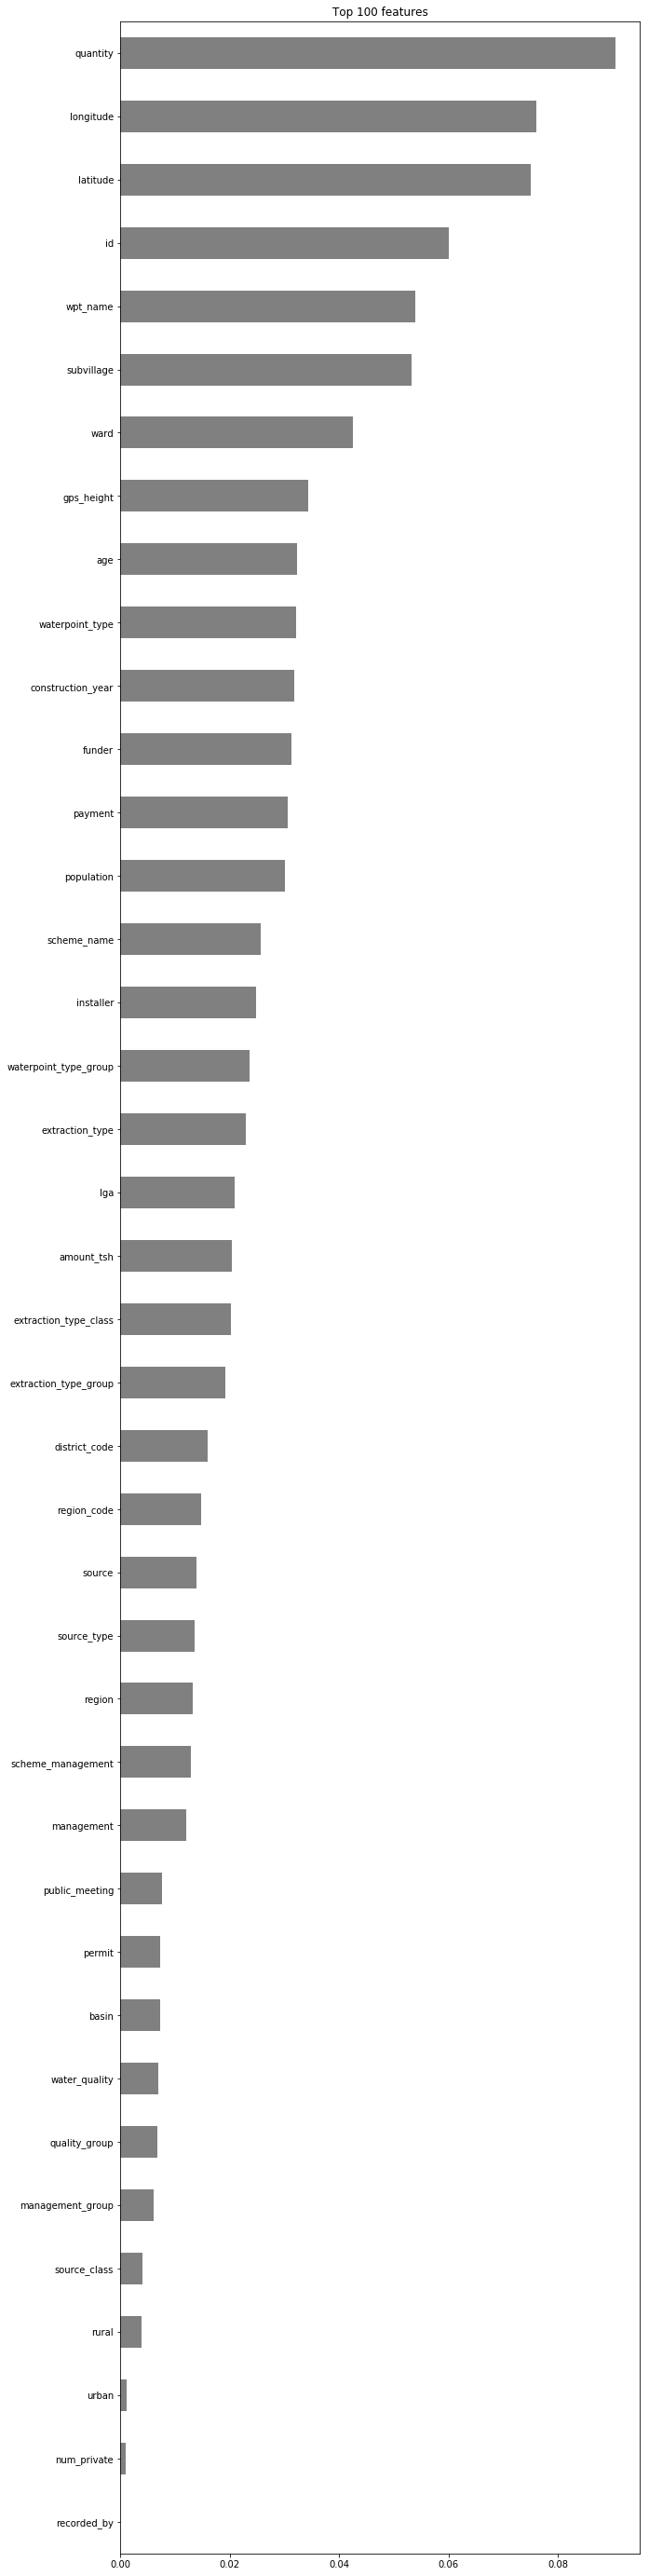

In [142]:
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 100
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

#WHAT are id and name doing there, honestly

In [101]:
#make submission for kaggle
X_test = test.drop(columns=['date_recorded'])

y_pred = pipeline.predict(X_test)

y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [102]:
submission = pd.DataFrame(data={'id':test['id'],'status_group':y_pred})

submission.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
submission.to_csv('third_submission.csv', index=False)

#testing code for feature engineering

In [50]:
train['region'].value_counts().index
#there are no nans in region, so what if 0 lats/longs were 
#recoded to the mean of their region's values?

Index(['Iringa', 'Shinyanga', 'Mbeya', 'Kilimanjaro', 'Morogoro', 'Arusha',
       'Kagera', 'Mwanza', 'Kigoma', 'Pwani', 'Ruvuma', 'Tanga', 'Dodoma',
       'Singida', 'Tabora', 'Mara', 'Rukwa', 'Mtwara', 'Manyara', 'Lindi',
       'Dar es Salaam'],
      dtype='object')

In [53]:
shin = train[train['region'] == 'Shinyanga']

print(shin.shape)
shin['longitude'].describe()

(3736, 41)


count    2983.000000
mean       33.237766
std         0.767857
min        31.454726
25%        32.531508
50%        33.422812
75%        33.869107
max        34.758734
Name: longitude, dtype: float64

In [51]:
train['latitude'] = train['latitude'].replace(-2e-08, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
train['latitude'] = train['latitude'].replace(0, np.nan)
train['longitude'] = train['longitude'].replace(0, np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
train['latitude'].mean()

-5.8844450361917

In [77]:
#means = pd.DataFrame(columns=['lat_mean','long_mean'])

train2 = pd.DataFrame(columns=train.columns)

#cuts data up by region, then assigns missing lat and long values to regional mean
for region in train['region'].value_counts().index:
  df = train[train['region'] == region]
  lat_mean = df['latitude'].mean()
  long_mean = df['longitude'].mean()
  df['latitude'] = df['latitude'].replace(np.nan,lat_mean)
  df['longitude'] = df['longitude'].replace(np.nan,long_mean)
  train2 = train2.append(df)
  
train2.describe()
  
  
  
  #row = pd.DataFrame(data={'lat_mean':lat_mean,'long_mean':long_mean},
  #                   index=[region],
  #                   columns=['lat_mean','long_mean'])
  #means = means.append(row)
  
#means


#step one: turn zeroes into nans
#step two: turn nans into the mean for that region

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,amount_tsh,longitude,latitude
count,44550.000000,44550.000000,44550.000000
mean,326.361114,35.095594,-5.801064
std,3291.640548,2.593740,2.806288
min,0.000000,29.607122,-11.649440
25%,0.000000,33.229314,-8.529283
50%,0.000000,34.914362,-5.022018
75%,20.000000,37.181498,-3.358985
max,350000.000000,40.345193,-0.998464


In [78]:
train2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
39170,28051,3000.0,2011-03-08,Danida,999,DANID,35.434179,-7.670286,none,0,Rufiji,Majengo,Iringa,11,1,Iringa Rural,Mlowa,1,True,GeoData Consultants Ltd,VWC,Mlowa,True,1993,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
51256,56984,1000.0,2011-03-18,Government Of Tanzania,2101,Commu,33.956202,-8.970493,none,0,Rufiji,Amani,Iringa,11,3,Makete,Matamba,0,False,GeoData Consultants Ltd,VWC,Matamb,False,1974,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
49712,40773,0.0,2011-11-03,Community,2199,Community,34.440416,-9.307223,Kwa Anita Mgaya,0,Lake Nyasa,Igerukilo,Iringa,11,4,Njombe,Igosi,100,True,GeoData Consultants Ltd,VWC,Moronga,True,1999,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
39473,24519,0.0,2011-03-23,Government Of Tanzania,2083,Commu,34.046703,-9.341853,none,0,Lake Nyasa,Kivulunge,Iringa,11,3,Makete,Kipagalo,0,True,GeoData Consultants Ltd,WUA,Kitula,False,1990,gravity,gravity,gravity,wua,user-group,never pay,never pay,unknown,unknown,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
24823,39657,500.0,2011-03-21,Rc,2060,ACRA,34.664673,-9.357969,Modesta Kaoge,0,Rufiji,Idunda,Iringa,11,4,Njombe,Imalinyi,50,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [79]:
train2[train2['region'] == 'Shinyanga']['latitude'].describe()

count    3736.000000
mean       -3.494293
std         0.293065
min        -4.381946
25%        -3.690345
50%        -3.494293
75%        -3.301186
max        -2.832405
Name: latitude, dtype: float64

In [71]:
means.loc['Shinyanga']

lat_mean     -3.494293
long_mean    33.237766
Name: Shinyanga, dtype: float64

In [72]:
means.loc['Shinyanga'][0] #latitude mean for Shinyanga

-3.494292838169631

In [73]:
means.loc['Shinyanga'][1] #longitude mean

33.2377663548241

In [75]:
train.shape

(44550, 41)

In [81]:
train2['longitude'].describe()

count    44550.000000
mean        35.095594
std          2.593740
min         29.607122
25%         33.229314
50%         34.914362
75%         37.181498
max         40.345193
Name: longitude, dtype: float64

In [114]:
test['basin'].value_counts(dropna=False)

Lake Victoria              2535
Pangani                    2153
Rufiji                     1968
Internal                   1699
Lake Tanganyika            1592
Wami / Ruvu                1558
Lake Nyasa                 1166
Ruvuma / Southern Coast    1087
Lake Rukwa                  600
Name: basin, dtype: int64

In [115]:
test['subvillage'].value_counts(dropna=False)

Shuleni                 136
Majengo                 125
Madukani                116
NaN                      94
Kati                     91
Sokoni                   62
Mtakuja                  60
M                        51
Mbuyuni                  46
Songambele               46
Muungano                 41
Amani                    36
Mlimani                  36
Kanisani                 35
Miembeni                 33
Msikitini                30
Kibaoni                  29
Bondeni                  29
Kichangani               26
Nyerere                  24
Mtaa Wa Kitunda Kati     24
1                        23
Mjini                    23
Mwenge                   23
Kisiwani                 22
Senta                    22
Mtaa Wa Kivule           21
Mkwajuni                 21
Msumbiji                 21
Mjimwema                 21
                       ... 
Ilangara                  1
Kikara                    1
Bulolwambeshi             1
Nkwansira Kati            1
Tulole Center       

In [116]:
test['lga'].value_counts(dropna=False)
#could urban/rural make a difference?

Njombe              611
Moshi Rural         315
Bariadi             305
Kasulu              275
Kilosa              270
Bagamoyo            266
Arusha Rural        263
Mbozi               249
Kilombero           248
Meru                233
Same                229
Kibondo             227
Rungwe              214
Kyela               209
Maswa               206
Magu                206
Singida Rural       206
Kahama              200
Mbinga              193
Kigoma Rural        191
Serengeti           189
Karagwe             189
Songea Rural        183
Ngara               182
Ulanga              176
Iringa Rural        174
Mvomero             174
Mpanda              168
Shinyanga Rural     158
Kwimba              155
                   ... 
Nanyumbu             55
Tarime               55
Simanjiro            54
Chato                52
Liwale               51
Temeke               51
Kilindi              50
Bahi                 50
Kisarawe             46
Sikonge              44
Shinyanga Urban 

In [117]:
test['ward'].value_counts(dropna=False)

Igosi               79
Siha Kati           65
Imalinyi            64
Mdandu              60
Kitunda             57
Nduruma             44
Zinga/Ikerege       44
Mishamo             43
Chalinze            42
Msindo              41
Ngarenanyuki        40
Nkoma               38
Maji ya Chai        37
Vikindu             37
Mtwango             36
Mvomero             35
Usuka               35
Muzye               35
Magomeni            35
Hedaru              35
Masama Magharibi    34
Wino                33
Ilolangulu          33
Chanika             33
Mahongole           31
Rujewa              31
Mang'ula            31
Ihanda              31
Soga                30
Makwale             30
                    ..
Mtekente             1
Salama               1
Nanyamba             1
Itewe                1
Kikole               1
Nyakamwaga           1
Budakwa              1
Kwafungo             1
Naiyobi              1
Balangidalalu        1
Mpiruka              1
Kimwani              1
Manyondwe  

In [130]:
#'urban' = whether the word 'urban' appears in the lga
test['urban'] = test['lga'].apply(lambda s: "Urban" in s)

test[test['lga'] == 'Shinyanga Urban']

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,urban
249,51961,0.0,2012-10-06,Wsdp,0,DWE,33.549580,-3.583372,Shuleni,0,Internal,Mwanubi,Shinyanga,17,7,Shinyanga Urban,Kolandoto,NaN,False,GeoData Consultants Ltd,Private operator,NaN,False,NaN,nira/tanira,nira/tanira,handpump,private operator,commercial,never pay,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,True
363,34073,0.0,2012-10-03,Oxfarm Gb,0,EMANDA BUILDERS,33.447226,-3.683923,Shuleni,0,Internal,Iwe Lyangula,Shinyanga,17,7,Shinyanga Urban,Kitangili,NaN,False,GeoData Consultants Ltd,Parastatal,NaN,False,NaN,gravity,gravity,gravity,parastatal,parastatal,pay per bucket,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,NaN,True
715,48361,0.0,2012-10-02,Dwst,0,DWE,33.432014,-3.700844,Busongo,0,Internal,Busonge,Shinyanga,17,7,Shinyanga Urban,Kizumbi,NaN,False,GeoData Consultants Ltd,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,other,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,True
1091,42685,0.0,2012-10-04,Wsdp,0,DWE,33.452100,-3.580873,Kwa Mzee Paulo,0,Internal,Nhobola,Shinyanga,17,7,Shinyanga Urban,Mwamalili,NaN,False,GeoData Consultants Ltd,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,salty,salty,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,True
1218,70092,0.0,2012-10-02,Dwsp,0,DWE,33.399015,-3.698744,Kwa Bibi Sofia,0,Internal,Bugambelele,Shinyanga,17,7,Shinyanga Urban,Kizumbi,NaN,True,GeoData Consultants Ltd,WUG,NaN,True,NaN,afridev,afridev,handpump,wug,user-group,pay when scheme fails,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,True
1708,4210,0.0,2012-10-02,Adb,0,ADB,33.460350,-3.745568,Mzee Joseph,0,Internal,Mwamashele,Shinyanga,17,7,Shinyanga Urban,Kizumbi,NaN,True,GeoData Consultants Ltd,WUG,NaN,False,NaN,other,other,other,wug,user-group,pay per bucket,soft,good,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,NaN,True
1836,39654,0.0,2012-10-09,Dwsp,0,DWE,33.509532,-3.624867,Kwa Mzee Simbi,0,Internal,Bunyanyembe,Shinyanga,17,7,Shinyanga Urban,Ibadakuli,NaN,NaN,GeoData Consultants Ltd,WUG,NaN,False,NaN,afridev,afridev,handpump,wug,user-group,unknown,salty,salty,insufficient,hand dtw,borehole,groundwater,hand pump,hand pump,NaN,True
2047,889,0.0,2012-10-03,Wsdp,0,WSDP,33.363540,-3.603331,Kwa Mzee Ng'Wananhomi,0,Internal,Nhendegese,Shinyanga,17,7,Shinyanga Urban,Chibe,NaN,True,GeoData Consultants Ltd,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,pay per bucket,salty,salty,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,True
2091,10117,0.0,2012-10-10,Wsdp,0,DWE,33.472088,-3.595454,Kwa Mzee Mahushi,0,Internal,Ilubalo,Shinyanga,17,7,Shinyanga Urban,Ibadakuli,NaN,False,GeoData Consultants Ltd,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,salty,salty,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,True
2301,9905,0.0,2012-10-09,Dwsp,0,DWE,33.478086,-3.626657,Kwa Mzee Tungu,0,Internal,Mpera C,Shinyanga,17,7,Shinyanga Urban,Ibadakuli,NaN,NaN,GeoData Consultants Ltd,WUG,NaN,False,NaN,afridev,afridev,handpump,wug,user-group,unknown,salty,salty,insufficient,hand dtw,borehole,groundwater,hand pump,hand pump,NaN,True


In [131]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,urban
13,14017,0.0,2011-07-29,Ministry Of Water,0,DWE,33.007680,-3.209529,Gati La Shuleni,0,Lake Victoria,Ilobashi,Mwanza,19,4,Kwimba,Bupamwa,NaN,True,GeoData Consultants Ltd,VWC,Mradi wa maji Kiliwi,True,NaN,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,NaN,False
22,70970,0.0,2012-10-07,Mwanashila,0,DWE,33.722359,-3.047122,Toyekukoya Groups,0,Lake Victoria,Ging'Hi,Shinyanga,17,2,Maswa,Buchambi,NaN,True,GeoData Consultants Ltd,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False
26,44718,0.0,2013-02-04,Dwsp,0,DWE,32.771259,-2.238252,Nkubanija,0,Lake Victoria,Nkonze,Shinyanga,17,1,Bariadi,Lugulu,NaN,True,GeoData Consultants Ltd,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,pay when scheme fails,salty abandoned,salty,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False
40,53540,0.0,2012-10-12,World Bank,0,World Bank,33.144915,-3.717538,Kwa Kulwa Lusoka,0,Lake Victoria,Kaselya,Shinyanga,17,3,Shinyanga Rural,Usule,NaN,True,GeoData Consultants Ltd,VWC,Kaselya,True,NaN,other,other,other,vwc,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,NaN,False
41,43291,0.0,2011-08-14,Rotary Club,0,Rotary club,33.331996,-2.703364,Nyasambi,0,Lake Victoria,Nyasambi,Mwanza,19,4,Kwimba,Ngulla,NaN,True,GeoData Consultants Ltd,VWC,NaN,True,NaN,swn 80,swn 80,handpump,vwc,user-group,never pay,unknown,unknown,dry,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False


In [132]:
#'rural' = whether the word 'rural' appears in the lga
test['rural'] = test['lga'].apply(lambda s: "Rural" in s)

test[test['lga'] == 'Shinyanga Rural']

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,urban,rural
40,53540,0.0,2012-10-12,World Bank,0,World Bank,33.144915,-3.717538,Kwa Kulwa Lusoka,0,Lake Victoria,Kaselya,Shinyanga,17,3,Shinyanga Rural,Usule,NaN,True,GeoData Consultants Ltd,VWC,Kaselya,True,NaN,other,other,other,vwc,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,NaN,False,True
177,43579,0.0,2012-10-08,Twesa,0,TWESA,32.929927,-3.574345,Mkombozi,0,Lake Victoria,Majengo,Shinyanga,17,3,Shinyanga Rural,Lyabukande,NaN,True,GeoData Consultants Ltd,WUG,NaN,True,NaN,swn 80,swn 80,handpump,wug,user-group,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False,True
293,67268,0.0,2012-10-03,Dwsp,0,DWSP,32.850083,-3.301362,Nyaguganwa,0,Lake Victoria,Nyaguganwa,Shinyanga,17,3,Shinyanga Rural,Salawe,NaN,True,GeoData Consultants Ltd,WUG,NaN,True,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,milky,milky,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False,True
418,55279,0.0,2012-10-08,Twesa,0,TWESA,32.982426,-3.570496,Mwanangi Shuleni,0,Lake Victoria,Buzinza,Shinyanga,17,3,Shinyanga Rural,Lyabukande,NaN,True,GeoData Consultants Ltd,Parastatal,NaN,True,NaN,other,other,other,parastatal,parastatal,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,NaN,False,True
844,58900,0.0,2012-10-02,Twesa,0,TWESA,32.878808,-3.349320,Shuleni,0,Lake Victoria,Nyamikonzi,Shinyanga,17,3,Shinyanga Rural,Salawe,NaN,True,GeoData Consultants Ltd,Parastatal,NaN,True,NaN,india mark iii,india mark iii,handpump,parastatal,parastatal,never pay,soft,good,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False,True
1355,42313,0.0,2012-10-08,Rwssp,0,RWSSP,32.900205,-3.398133,Igunanilo,0,Lake Victoria,Nyashimba,Shinyanga,17,3,Shinyanga Rural,Solwa,NaN,True,GeoData Consultants Ltd,WUG,NaN,True,NaN,afridev,afridev,handpump,wug,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,NaN,False,True
2104,63930,0.0,2012-10-07,Rwssp,0,RWSSP,32.944142,-3.379944,Mwandutu Shuleni,0,Lake Victoria,Mwambiti,Shinyanga,17,3,Shinyanga Rural,Solwa,NaN,True,GeoData Consultants Ltd,WUG,NaN,True,NaN,walimi,other handpump,handpump,wug,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,NaN,False,True
2238,3351,0.0,2012-10-04,Dwsp,0,DWSP,32.723837,-3.375254,Maendeleo,0,Lake Victoria,Mwakitolyo A,Shinyanga,17,3,Shinyanga Rural,Mwakitolyo,NaN,True,GeoData Consultants Ltd,WUG,NaN,True,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False,True
2426,66429,0.0,2012-10-04,Dwsp,0,DWSP,32.696979,-3.356989,Mkuyuni,0,Lake Victoria,Shabela,Shinyanga,17,3,Shinyanga Rural,Mwakitolyo,NaN,True,GeoData Consultants Ltd,WUG,NaN,True,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,other,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,False,True
2507,51924,0.0,2012-10-12,Government Of Tanzania,0,Government,33.128724,-3.731619,Center,0,Lake Victoria,Igalula,Shinyanga,17,3,Shinyanga Rural,Imesela,NaN,True,GeoData Consultants Ltd,VWC,Tangini,True,NaN,other,other,other,vwc,user-group,never pay,soft,good,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,NaN,False,True
